# Problem Set #8
### MACS 30100, Dr Evans
### Xi Chen

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore") 

In [4]:
drink_data = pd.read_csv('strongdrink.txt', sep = ',')
drink_data.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X = drink_data[['alco', 'malic', 'tot_phen', 'color_int']].values
y = drink_data['cultivar'].values

## (a) Create a scatterplot of alcohol (alco) and color intensity (color_int)

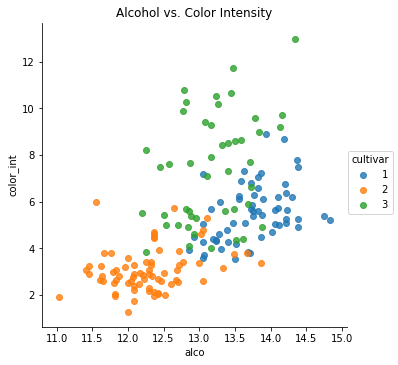

In [5]:
sns.lmplot('alco', 'color_int', fit_reg = False, data = drink_data, hue = 'cultivar')
ax = plt.gca()
ax.set_title("Alcohol vs. Color Intensity")
plt.show()

## (b) Use sklearn.linear model.LogisticRegression to ﬁt a multinomial logistic model 

In [24]:
k = 4
clf_mlog = KFold(n_splits=k, random_state=22, shuffle=True)
clf_mlog.get_n_splits(X)
MSE = np.zeros(k)
C = np.zeros(200)
MSE_C = np.zeros(200)

for c in range(200):
    k_ind = int(0)
    for train_index, test_index in clf_mlog.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        LogReg = LogisticRegression(multi_class='multinomial', fit_intercept = True,
                                    solver='newton-cg', C = (c/100 + 0.01))
        LogReg.fit(X_train, y_train)
        y_pred = LogReg.predict(X_test)
        error = y_test != y_pred
        MSE[k_ind] = error.mean()
        k_ind += 1
    C[c] = c/100 + 0.01
    MSE_C[c] =  MSE.mean()
MSE_logit = pd.DataFrame({'C':C, 'MSE':MSE_C})

In [26]:
MSE_logit.sort_values(['MSE']).head(25)

,C,MSE
43,0.44,0.068182
44,0.45,0.068182
42,0.43,0.068182
41,0.42,0.068182
40,0.41,0.068182
39,0.40,0.068182
27,0.28,0.068182
28,0.29,0.068182
29,0.30,0.068182
30,0.31,0.068182


When C = 0.44, or 0.45, or 0.43, or 0.42 (there are several cases), penalty is 'l2', the logistic model has the lowest MSE of 0.068182.

## (c) Use sklearn.ensemble.RandomForestClassifier to ﬁt a random forest model 

In [19]:
MSE_df = pd.DataFrame({"min_samples_leaf" : np.zeros(5),
                         "max_depth" : np.zeros(5),
                         "n_estimator" : np.zeros(5),
                         "MSE" : np.zeros(5)})
MSE_RF = MSE_df[:0]

for msl in range(5):
    for md in range(9):
        for n_est in range(5):
            n_est_temp = n_est * 20 + 20
            msl_temp = msl * 5 + 5
            md_temp = md + 1
            RF = RandomForestClassifier(n_estimators = n_est_temp,
                                        min_samples_leaf = msl_temp,
                                        max_depth = md_temp, bootstrap=True, 
                                        oob_score=True, random_state=22)
            RF.fit(X, y)
            MSE_df["n_estimator"][n_est] = n_est_temp
            MSE_df["max_depth"][n_est] = md_temp
            MSE_df["min_samples_leaf"][n_est] = msl_temp
            MSE_df["MSE"][n_est] = 1 - RF.oob_score_
        MSE_RF = pd.concat([MSE_RF, MSE_df])

In [21]:
MSE_RF.index = range(len(MSE_RF))
MSE_RF.sort_values(['MSE']).head(10)

,MSE,max_depth,min_samples_leaf,n_estimator
79,0.068182,7.0,10.0,100.0
58,0.068182,3.0,10.0,80.0
59,0.068182,3.0,10.0,100.0
89,0.068182,9.0,10.0,100.0
69,0.068182,5.0,10.0,100.0
84,0.068182,8.0,10.0,100.0
64,0.068182,4.0,10.0,100.0
74,0.068182,6.0,10.0,100.0
7,0.079545,2.0,5.0,60.0
38,0.079545,8.0,5.0,80.0


There are several cases that have the lowest MSE of 0.068182:

When max_depth = 5.0, and min_samples_leaft = 10.0, n_estimator = 100.0, the Random Forest Model has the lowest MSE of 0.068182.

When max_depth = 11.0, and min_samples_leaft = 10.0, n_estimator = 100.0, the Random Forest Model has the lowest MSE of 0.068182.

When max_depth = 9.0, and min_samples_leaft = 10.0, n_estimator = 100.0, the Random Forest Model has the lowest MSE of 0.068182.

When max_depth = 12.0, and min_samples_leaft = 10.0, n_estimator = 100.0, the Random Forest Model has the lowest MSE of 0.068182.

When max_depth = 8.0, and min_samples_leaft = 10.0, n_estimator = 100.0, the Random Forest Model has the lowest MSE of 0.068182.

## (d) Use sklearn.svm.SVC to ﬁt a support vector machines model 

In [7]:
k = 4
clf_svm = KFold(n_splits=k, random_state=22, shuffle=True)
clf_svm.get_n_splits(X)
MSE = np.zeros(k)
MSE_C = pd.DataFrame({"C" : np.zeros(100),
                      "Gamma" : np.zeros(100),
                      "MSE" : np.zeros(100)})
MSE_SVM = MSE_C[:0]

for g in range(100):
    for c in range(100):
        k_ind = int(0)
        for train_index, test_index in clf_svm.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            svc = svm.SVC(kernel='rbf', gamma = (g/20 + 0.05),
                          C=c/20 + 0.05)
            svc.fit(X_train, y_train)
            y_pred = svc.predict(X_test)
            error = y_test != y_pred
            MSE[k_ind] = error.mean()
            k_ind += 1
        MSE_C['C'][c] = c/20 + 0.05
        MSE_C['Gamma'][c] = g/20 + 0.05
        MSE_C['MSE'][c] =  MSE.mean()
    MSE_SVM = pd.concat([MSE_SVM, MSE_C])

In [8]:
MSE_SVM.index = range(len(MSE_SVM))
MSE_SVM.sort_values(['MSE']).head()

,C,Gamma,MSE
3319,1.00,1.70,0.045455
3218,0.95,1.65,0.045455
3318,0.95,1.70,0.045455
251,2.60,0.15,0.051136
365,3.30,0.20,0.051136


There are three cases that has the lowest MSE of 0.045455:

When cost = 1.00, Gamma = 1.70, the SVM model has the lowest MSE of 0.045455.

When cost = 0.95, Gamma = 1.65, the SVM model has the lowest MSE of 0.045455.

When cost = 0.95, Gamma = 1.70, the SVM model has the lowest MSE of 0.045455.

## (e) Use sklearn.neural network.MLPClassifier to ﬁt a single hidden layer neural network model 

In [9]:
k = 4
clf_mlp = KFold(n_splits=k, random_state=22, shuffle=True)
clf_mlp.get_n_splits(X)
MSE = np.zeros(k)
activ = np.array(['identity', 'logistic', 'tanh', 'relu'])
MSE_al = pd.DataFrame({"activation" : np.zeros(20),
                       "hidden_layer_size" : np.zeros(20),
                       "alpha" : np.zeros(20),
                       "MSE":np.zeros(20)})
MSE_mlp = MSE_al[:0]

for ac in range(4):
    for h in range(8):
        for al in range(20):
            k_ind = int(0)
            for train_index, test_index in clf_mlp.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                mlp = MLPClassifier(activation=activ[ac], solver='lbfgs',
                                    alpha=(al/20 + 0.05), random_state=25,
                                    hidden_layer_sizes = ((50 * (h + 1)),))
                mlp.fit(X_train, y_train)
                y_pred = mlp.predict(X_test)
                error = y_test != y_pred
                MSE[k_ind] = error.mean()
                k_ind += 1
            MSE_al['activation'][al] = activ[ac]
            MSE_al['hidden_layer_size'][al] = 50 * (h + 1)
            MSE_al['alpha'][al] = al/20 + 0.05
            MSE_al['MSE'][al] =  MSE.mean()
        MSE_mlp = pd.concat([MSE_mlp, MSE_al])

In [10]:
MSE_mlp.index = range(len(MSE_mlp))
MSE_mlp.sort_values(['MSE']).head()

,MSE,activation,alpha,hidden_layer_size
585,0.034091,relu,0.30,300.0
551,0.039773,relu,0.60,200.0
549,0.039773,relu,0.50,200.0
561,0.039773,relu,0.10,250.0
584,0.039773,relu,0.25,300.0


When activation = 'relu', alpha = 0.30 and hidden_layer_size  = 300, the MLP model has the lowest MSE of 0.034091.

## (f) Comparision of the models above 

The logistic regression model has the smallest MSE of 0.068182.

The Random Forest model has the smallest MSE of 0.068182.

The SVM model has the smallest MSE of 0.045455.

The MLP neural network model has the smallest MSE of 0.034091.

Therefore, the MLP neural network model has the lowest MSE, so it is the best predictor of cultivar. 